# 1. Clasificacion de imagenes 

In [ ]:
import os 
!pip install -Uqq fastai duckduckgo_search

     |████████████████████████████████| 62 kB 862 kB/s 
     |████████████████████████████████| 96 kB 5.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('Albert Einstein', max_images=1)
urls[0]

Searching for 'Albert Einstein'


'https://api.time.com/wp-content/uploads/2015/10/gettyimages-128614304.jpg'

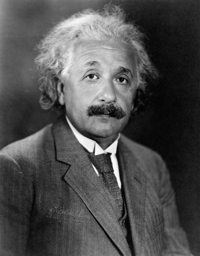

In [ ]:
from fastdownload import download_url
dest = 'Albert Einstein.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'Stephen Hawking'


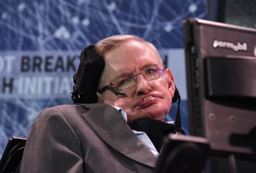

In [ ]:
download_url(search_images('Stephen Hawking', max_images=1)[0], 'Stephen.jpg', show_progress=False)
Image.open('Stephen.jpg').to_thumb(256,256)

Searching for 'Paul Dirac'


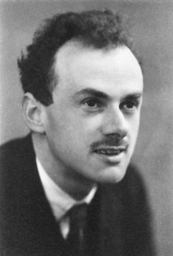

In [ ]:
download_url(search_images('Paul Dirac', max_images=1)[0], 'Dirac.jpg', show_progress=False)
Image.open('Dirac.jpg').to_thumb(256,256)

In [ ]:
searches = 'Albert Einstein', 'Stephen Hawking', 'Paul Dirac'
path = Path('scientists')
from time import sleep 

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} Photo'))
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Albert Einstein Photo'
Searching for 'Stephen Hawking Photo'
Searching for 'Paul Dirac Photo'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

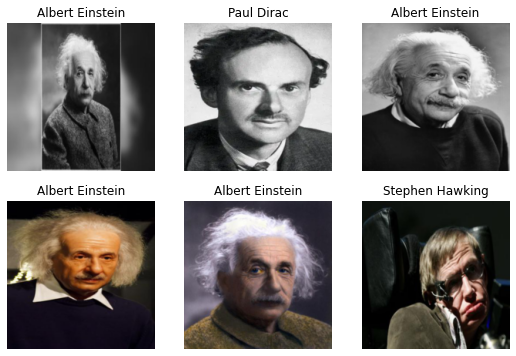

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
hola = learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.135805,2.205041,0.470588,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.909025,1.061253,0.411765,00:01
1,0.645607,0.360035,0.117647,00:01
2,0.473759,0.097204,0.000000,00:00
3,0.353147,0.058592,0.000000,00:00
4,0.283903,0.062433,0.000000,00:00


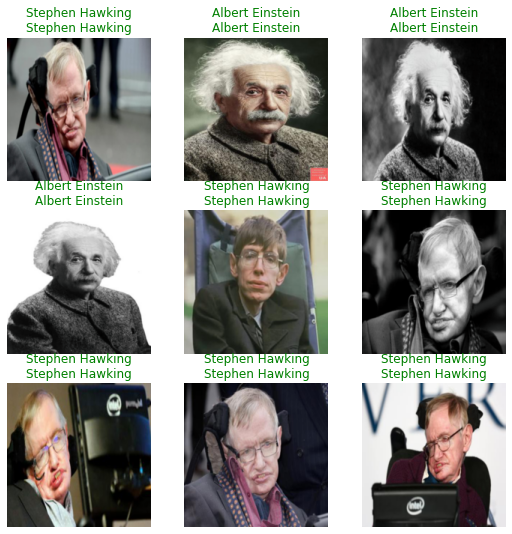

In [ ]:
learn.show_results()

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('Albert Einstein.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: Albert Einstein.
Probability it's a bird: 0.9996


# 2. Natural Language Processing

In [6]:
from fastai.text.all import *

In [7]:
# importar los datos, los descomprime y valida si son validos 
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)


In [8]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.457817,0.395431,0.823480,03:11


epoch,train_loss,valid_loss,accuracy,time
0,0.346451,0.286625,0.880960,06:57
1,0.293511,0.244129,0.903320,06:57
2,0.266839,0.237820,0.905160,06:57
3,0.236902,0.221577,0.911560,06:57


In [13]:
learn.predict("y don't liked that movie")

('neg', tensor(0), tensor([0.8437, 0.1563]))